In [1]:
import pandas as pd
import numpy as np

In [6]:
income = pd.read_csv('us_income.csv')
income.head()

,id,county,pop_over_25,median_income,median_income_no_hs,median_income_hs,median_income_some_college,median_income_college,median_income_graduate_degree
0,1001,"Autauga County, Alabama",35696,34581,17946,30157,33225,53248,68125
1,1003,"Baldwin County, Alabama",130063,31352,17474,25242,30922,46017,55933
2,1005,"Barbour County, Alabama",18988,25182,20692,21325,24090,41888,50245
3,1007,"Bibb County, Alabama",15340,27638,22274,28980,22387,30284,42236
4,1009,"Blount County, Alabama",38846,32808,24870,27541,34660,48681,53664


In [7]:
# finding the index of minimum of a column
income['median_income'].idxmin()

2736

In [22]:
lowest_income_county = income.loc[income['median_income'].idxmin():income['median_income'].idxmin(),['county']]

array(['Starr County, Texas'], dtype=object)

In [27]:
index_hp = income[income['pop_over_25']>500000]['median_income'].idxmin()
lowest_income_high_pop_county = income.loc[index_hp:index_hp,['county']]
lowest_income_high_pop_county

lowest_income_county = income["county"][income["median_income"].idxmin()]

high_pop = income[income["pop_over_25"] > 500000]
lowest_income_high_pop_county = high_pop["county"][high_pop["median_income"].idxmin()]

income['county'][1]
lowest_income_county

'Starr County, Texas'

### Playing With Random

In [34]:
import random

# Returns a random integer between the numbers 0 and 10, inclusive.
num = random.randint(0, 10)
print(num)

# Generate a sequence of 10 random numbers between the values of 0 and 10.
random_sequence = [random.randint(0, 10) for _ in range(10)]
print(random_sequence)
# Sometimes, when we generate a random sequence, we want it to be the same sequence whenever the program is run.
# An example is when you use random numbers to select a subset of the data, and you want other people
# looking at the same data to get the same subset.
# We can ensure this by setting a random seed.
# A random seed is an integer that is used to "seed" a random number generator.
# After a random seed is set, the numbers generated after will follow the same sequence.
random.seed(10)
print([random.randint(0,10) for _ in range(5)])
random.seed(10)
# Same sequence as above.
print([random.randint(0,10) for _ in range(5)])
random.seed(11)
# Different seed means different sequence.
print([random.randint(0,10) for _ in range(5)])

random.seed(20)
print([random.randint(0,10) for _ in range(10)])
random.seed(20)
print([random.randint(0,10) for _ in range(10)])
random.seed(20)
print([random.randint(0,10) for _ in range(10)])
random.seed(20)
print([random.randint(0,10) for _ in range(10)])

help(random)

6
[6, 1, 1, 2, 5, 7, 9, 7, 6, 3]
[9, 0, 6, 7, 9]
[9, 0, 6, 7, 9]
[7, 8, 7, 7, 8]
[10, 2, 4, 10, 10, 1, 5, 9, 2, 0]
[10, 2, 4, 10, 10, 1, 5, 9, 2, 0]
[10, 2, 4, 10, 10, 1, 5, 9, 2, 0]
[10, 2, 4, 10, 10, 1, 5, 9, 2, 0]
Help on module random:

NAME
    random - Random variable generators.

MODULE REFERENCE
    https://docs.python.org/3.6/library/random
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
        integers
        --------
               uniform within range
    
        sequences
        ---------
               pick random element
               pick random sample
               pick weighted random sample
               generate random permutation
    
        distributions on the real line:

#### Selecting items from a list 

In [ ]:
# Let's say that we have some data on how much shoppers spend in a store.
shopping = [300, 200, 100, 600, 20]

# We want to sample the data, and only select 4 elements.

random.seed(1)
shopping_sample = random.sample(shopping, 4)

# 4 random items from the shopping list.
print(shopping_sample)

## Population vs sample

* The probabilities we observe are not necessarily the true probabilities of an event occurring.
* The larger the sample size, the closer to the "true" probabilities we get

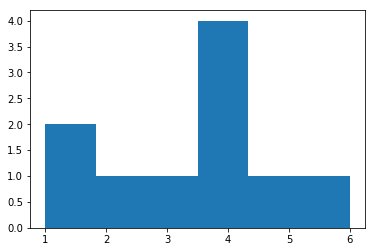

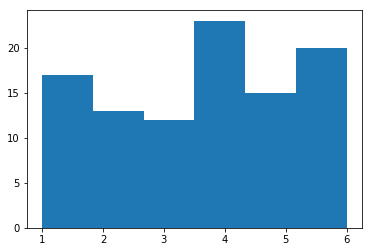

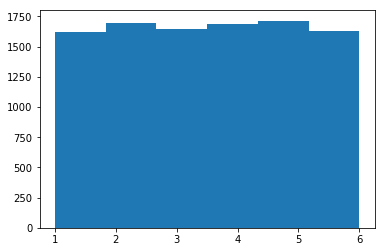

In [36]:
import matplotlib.pyplot as plt

# A function that returns the result of a die roll.
def roll():
    return random.randint(1, 6)

random.seed(1)
small_sample = [roll() for _ in range(10)]

# Plot a histogram with 6 bins (1 for each possible outcome of the die roll)
plt.hist(small_sample, 6)
plt.show()
random.seed(1)
medium_sample = [roll() for _ in range(100)]

plt.hist(medium_sample, 6)
plt.show()

random.seed(1)
large_sample = [roll() for _ in range(10000)]

plt.hist(large_sample, 6)
plt.show()

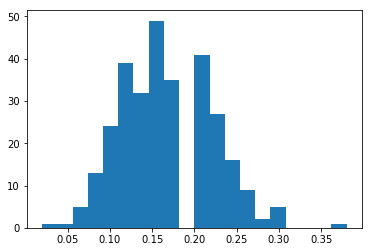

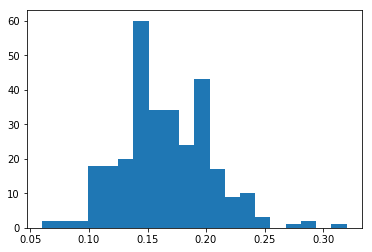

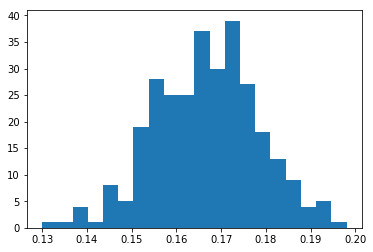

In [37]:
# trying out several option to find out the right sample size

def probability_of_one(num_trials, num_rolls):
    """
    This function will take in the number of trials, and the number of rolls per trial.
    Then it will conduct each trial, and record the probability of rolling a one.
    """
    probabilities = []
    for i in range(num_trials):
        die_rolls = [roll() for _ in range(num_rolls)]
        one_prob = len([d for d in die_rolls if d==1]) / num_rolls
        probabilities.append(one_prob)
    return probabilities

random.seed(1)
small_sample = probability_of_one(300, 50)
plt.hist(small_sample, 20)
plt.show()


random.seed(1)
medium_sample = probability_of_one(300, 100)
plt.hist(medium_sample, 20)
plt.show()

random.seed(1)
large_sample = probability_of_one(300, 1000)
plt.hist(large_sample, 20)
plt.show()

In [45]:
large_sample_std = np.std(large_sample)
deviations_from_mean = abs(.18 - np.mean(large_sample))/large_sample_std
over_18_count = len([l for l in large_sample if l >= .18])
deviations_from_mean
over_18_count

38

31063.09385937003


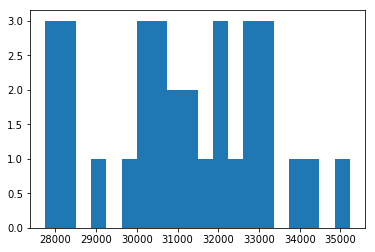

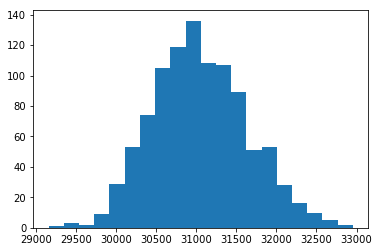

In [47]:
# This is the mean median income in any US county.
mean_median_income = income["median_income"].mean()
print(mean_median_income)

def get_sample_mean(start, end):
    return income["median_income"][start:end].mean()

def find_mean_incomes(row_step):
    mean_median_sample_incomes = []
    # Iterate over the indices of the income rows
    # Starting at 0, and counting in blocks of row_step (0, row_step, row_step * 2, etc).
    for i in range(0, income.shape[0], row_step):
        # Find the mean median for the row_step counties from i to i+row_step.
        mean_median_sample_incomes.append(get_sample_mean(i, i+row_step))
    return mean_median_sample_incomes

nonrandom_sample = find_mean_incomes(100)
plt.hist(nonrandom_sample, 20)
plt.show()

# What you're seeing above is the result of biased sampling.
# Instead of selecting randomly, we selected counties that were next to each other in the data.
# This picked counties in the same state more often that not, and created means that didn't represent the whole country.
# This is the danger of not using random sampling -- you end up with samples that don't reflect the entire population.
# This gives you a distribution that isn't normal.

import random
def select_random_sample(count):
    random_indices = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_indices]

# mean_median_random = []
# for i in range(1000):
#     random_sample = select_random_sample(100)
#     mean_median_random.append(random_sample['median_income'].mean())
# plt.hist(mean_median_random,20)
# plt.show()

random.seed(1)
random_sample = [select_random_sample(100)["median_income"].mean() for _ in range(1000)]
plt.hist(random_sample, 20)
plt.show()


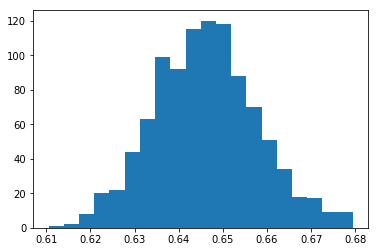

In [49]:
mean_ratios = []
for i in range(1000):
    sample_data = select_random_sample(100)
    ratios = sample_data['median_income_hs']/sample_data['median_income_college']
    mean_ratios.append(ratios.mean())

plt.hist(mean_ratios,20)
plt.show()

### Statistical significance


In [51]:
significance_value = len([m for m in mean_ratios if m >= .675])/len(mean_ratios)
significance_value

0.01